# Expected Value Sarsa 

In [1]:
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1
        
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

'bash' is not recognized as an internal or external command,
operable program or batch file.


env: DISPLAY=:1


In [15]:
from qlearning import QLearningAgent

class EVSarsaAgent(QLearningAgent):
    
    def get_value(self,state):
        epsilon =self.epsilon
        possible_actions = self.get_legal_actions(state)
        if len(possible_actions) == 0:
            return 0.0
        
        possible_values = [self.get_qvalue(state,action) for action in possible_actions]
        index = np.argmax(possible_values)
        state_value = epsilon * possible_values[index] + (1-epsilon) * (np.sum(possible_values))/len(possible_actions)
        return state_value

## cliff world 

In [4]:
import gym,gym.envs.toy_text
env = gym.envs.toy_text.CliffWalkingEnv()
n_actions = env.action_space.n
print(env.__doc__)


    This is a simple implementation of the Gridworld Cliff
    reinforcement learning task.

    Adapted from Example 6.6 (page 132) from Reinforcement Learning: An Introduction
    by Sutton and Barto:
    http://incompleteideas.net/book/the-book-2nd.html
    
    With inspiration from:
    https://github.com/dennybritz/reinforcement-learning/blob/master/lib/envs/cliff_walking.py

    The board is a 4x12 matrix, with (using Numpy matrix indexing):
        [3, 0] as the start at bottom-left
        [3, 11] as the goal at bottom-right
        [3, 1..10] as the cliff at bottom-center

    Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward 
    and a reset to the start. An episode terminates when the agent reaches the goal.
    


In [5]:
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



In [6]:
def play_and_train(env,agent,t_max=10**4):
    total_reward = 0.0
    s = env.reset()
    for t in range(t_max):
        a = agent.get_action(s)
        next_s,r,done,_ = env.step(a)
        agent.update(s,a,r,next_s)
        s = next_s
        total_reward += r
        if done: break
    return total_reward

In [16]:
from qlearning import QLearningAgent
agent_sarsa = EVSarsaAgent(alpha = 0.25, epsilon = 0.2, discount = 0.99, get_legal_actions = lambda s:range(n_actions))
agent_ql = QLearningAgent(alpha = 0.25, epsilon = 0.2, discount = 0.99, get_legal_actions = lambda s : range(n_actions))

EVSarsa mean reward = -92.0
QLearning mean reward = -220.0


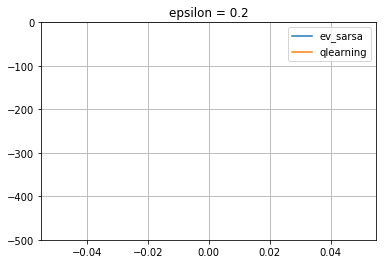

EVSarsa mean reward = -51.06
QLearning mean reward = -129.84


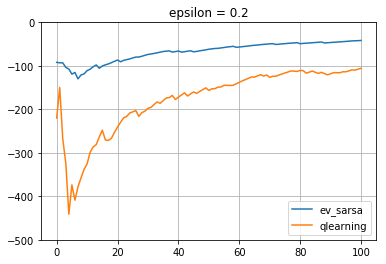

EVSarsa mean reward = -36.76
QLearning mean reward = -89.07


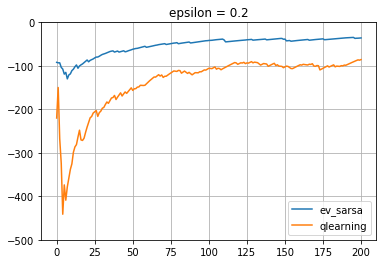

EVSarsa mean reward = -29.03
QLearning mean reward = -99.16


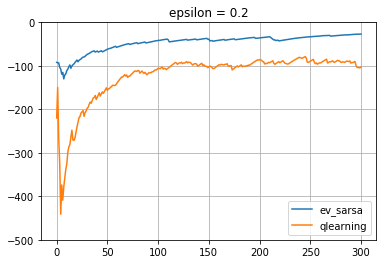

EVSarsa mean reward = -28.4
QLearning mean reward = -113.43


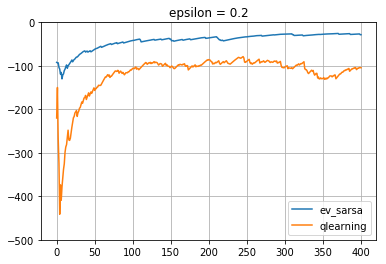

EVSarsa mean reward = -31.27
QLearning mean reward = -108.36


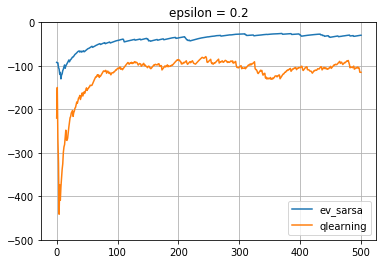

EVSarsa mean reward = -29.19
QLearning mean reward = -114.5


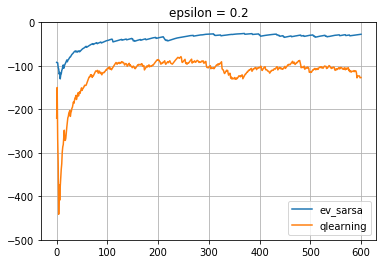

EVSarsa mean reward = -29.0
QLearning mean reward = -85.15


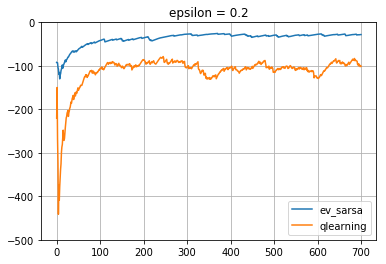

EVSarsa mean reward = -30.41
QLearning mean reward = -102.88


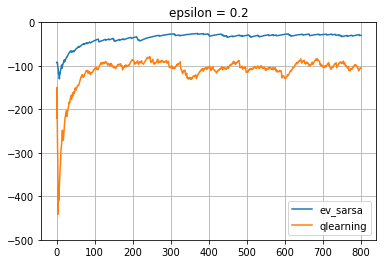

EVSarsa mean reward = -32.08
QLearning mean reward = -103.87


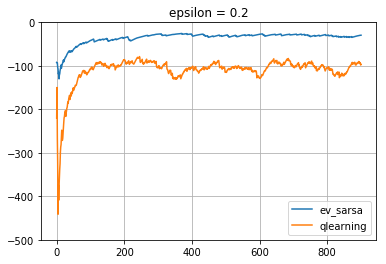

EVSarsa mean reward = -25.59
QLearning mean reward = -117.17


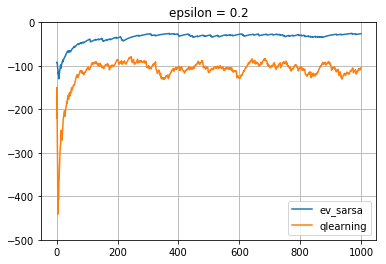

EVSarsa mean reward = -29.27
QLearning mean reward = -104.32


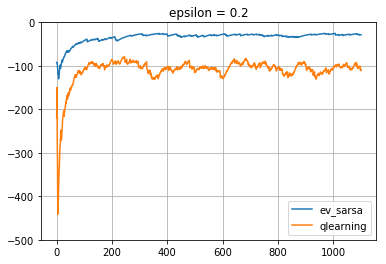

EVSarsa mean reward = -26.1
QLearning mean reward = -103.24


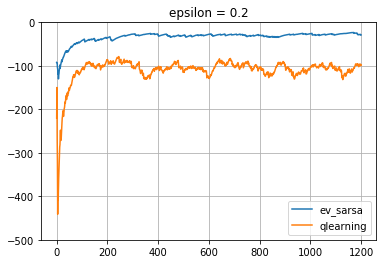

EVSarsa mean reward = -36.94
QLearning mean reward = -111.01


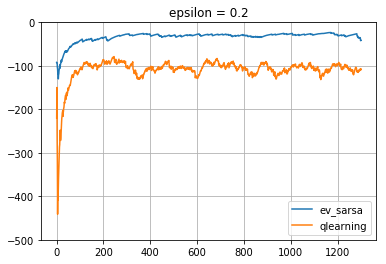

EVSarsa mean reward = -31.14
QLearning mean reward = -106.5


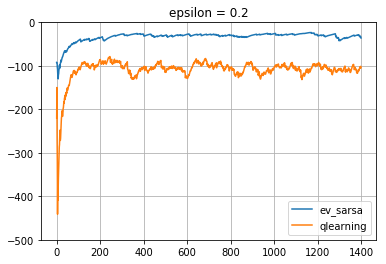

EVSarsa mean reward = -33.72
QLearning mean reward = -117.74


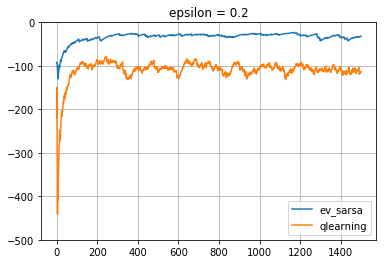

EVSarsa mean reward = -30.29
QLearning mean reward = -144.72


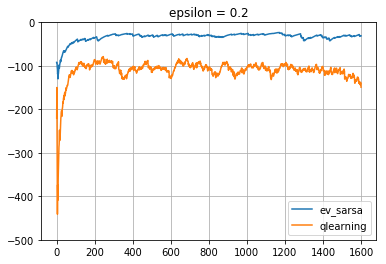

EVSarsa mean reward = -25.33
QLearning mean reward = -101.5


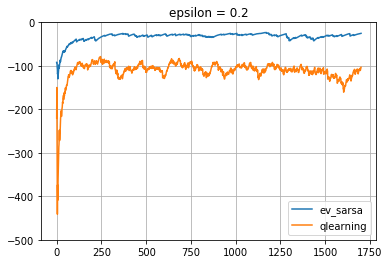

EVSarsa mean reward = -27.71
QLearning mean reward = -95.12


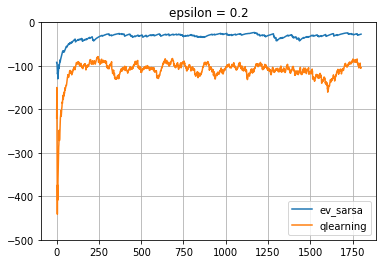

EVSarsa mean reward = -27.28
QLearning mean reward = -79.06


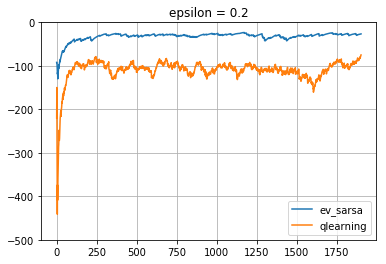

EVSarsa mean reward = -25.24
QLearning mean reward = -81.0


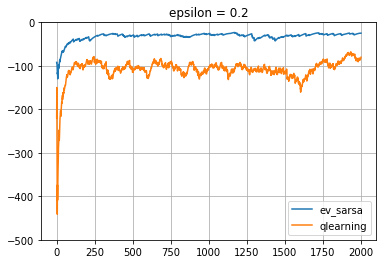

EVSarsa mean reward = -34.44
QLearning mean reward = -93.63


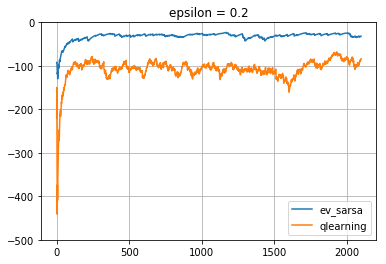

EVSarsa mean reward = -27.12
QLearning mean reward = -126.09


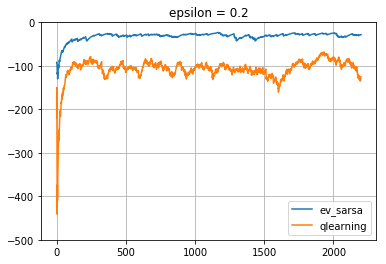

EVSarsa mean reward = -26.81
QLearning mean reward = -78.52


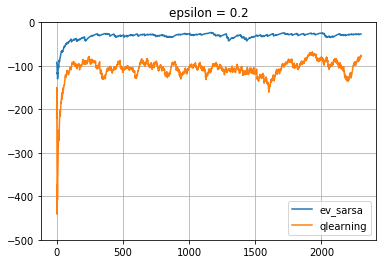

EVSarsa mean reward = -27.49
QLearning mean reward = -75.45


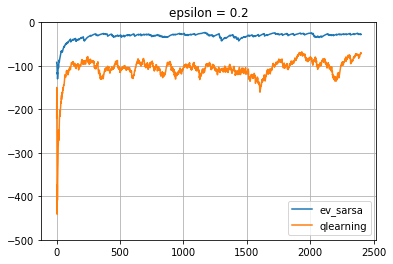

EVSarsa mean reward = -36.89
QLearning mean reward = -82.06


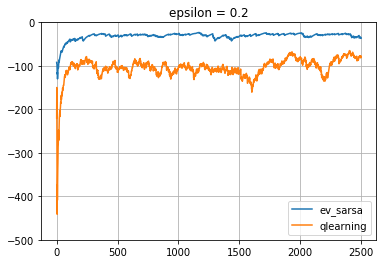

EVSarsa mean reward = -24.5
QLearning mean reward = -86.26


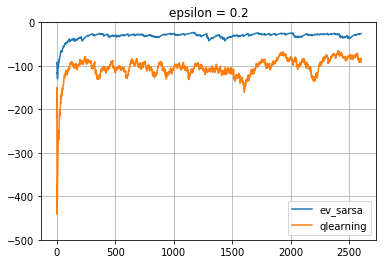

EVSarsa mean reward = -26.63
QLearning mean reward = -101.2


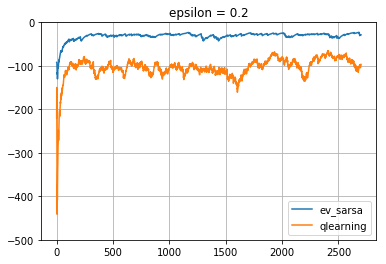

EVSarsa mean reward = -27.9
QLearning mean reward = -88.26


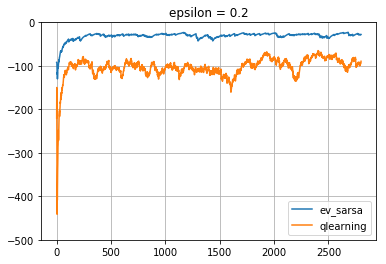

EVSarsa mean reward = -28.57
QLearning mean reward = -75.92


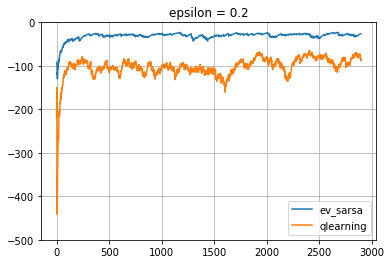

EVSarsa mean reward = -29.64
QLearning mean reward = -79.0


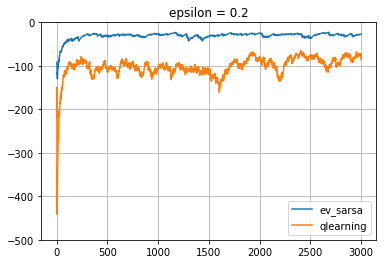

EVSarsa mean reward = -27.59
QLearning mean reward = -84.28


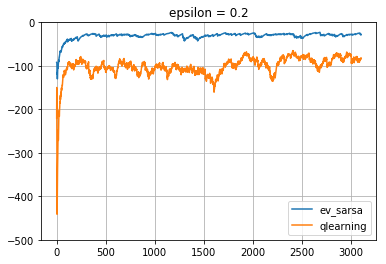

EVSarsa mean reward = -35.1
QLearning mean reward = -68.61


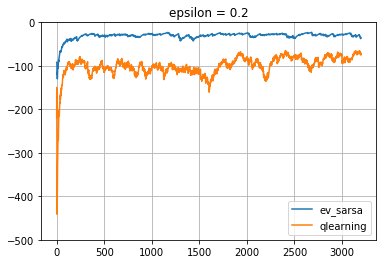

EVSarsa mean reward = -26.34
QLearning mean reward = -84.07


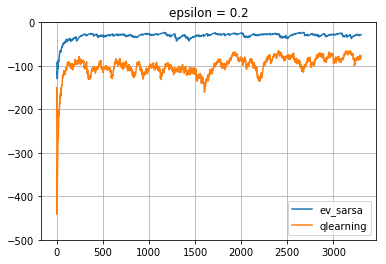

EVSarsa mean reward = -28.36
QLearning mean reward = -97.53


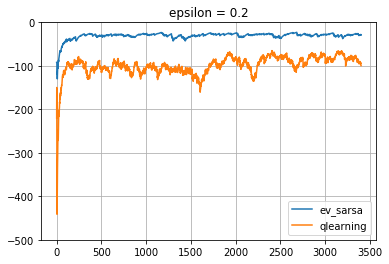

EVSarsa mean reward = -32.51
QLearning mean reward = -79.66


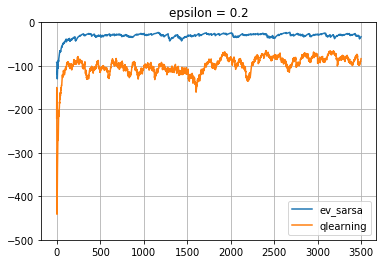

EVSarsa mean reward = -27.24
QLearning mean reward = -80.06


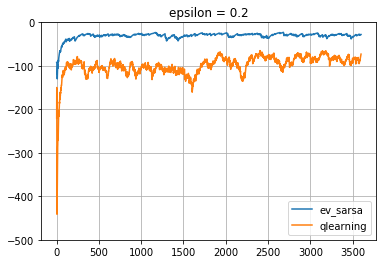

EVSarsa mean reward = -30.97
QLearning mean reward = -78.68


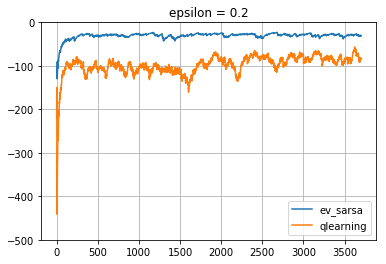

EVSarsa mean reward = -34.81
QLearning mean reward = -91.74


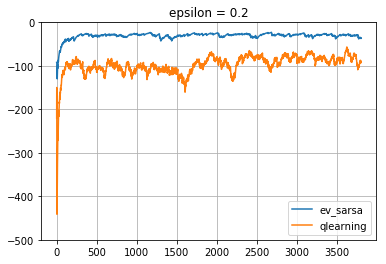

EVSarsa mean reward = -30.11
QLearning mean reward = -75.16


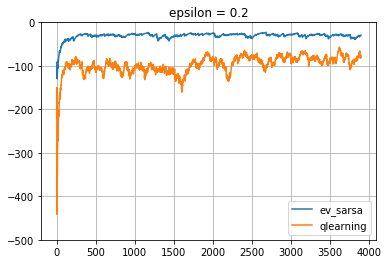

EVSarsa mean reward = -28.37
QLearning mean reward = -84.32


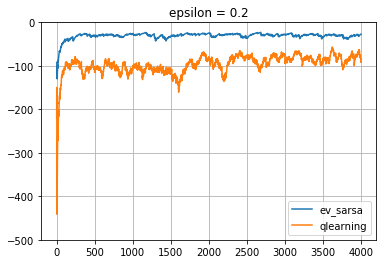

EVSarsa mean reward = -28.84
QLearning mean reward = -72.18


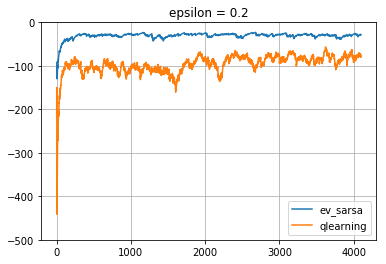

EVSarsa mean reward = -24.38
QLearning mean reward = -85.67


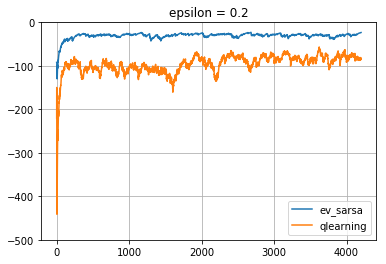

EVSarsa mean reward = -29.92
QLearning mean reward = -93.02


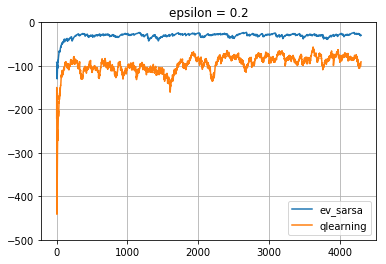

EVSarsa mean reward = -35.02
QLearning mean reward = -82.68


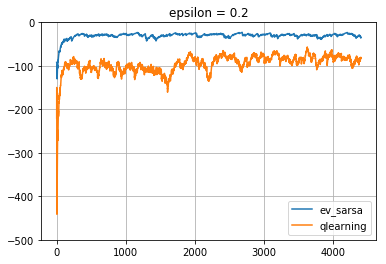

EVSarsa mean reward = -32.84
QLearning mean reward = -68.88


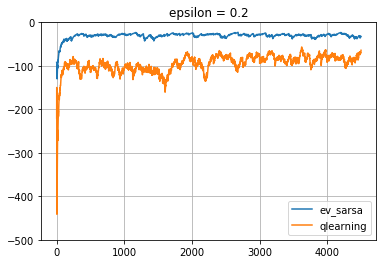

EVSarsa mean reward = -36.58
QLearning mean reward = -93.44


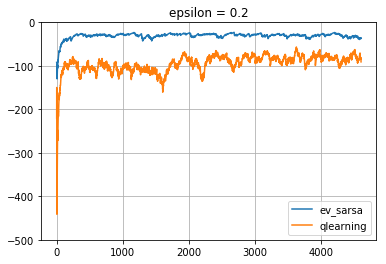

EVSarsa mean reward = -28.21
QLearning mean reward = -75.18


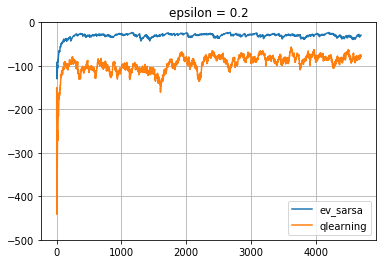

EVSarsa mean reward = -29.94
QLearning mean reward = -92.9


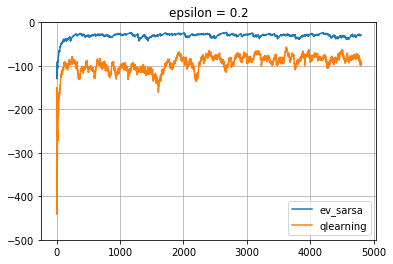

EVSarsa mean reward = -27.3
QLearning mean reward = -86.1


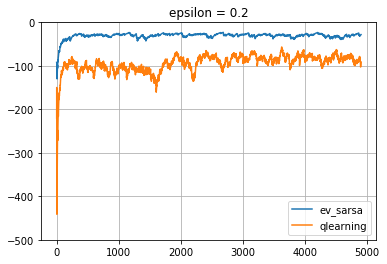

In [20]:
from IPython.display import clear_output
from pandas import DataFrame
moving_average = lambda x, span = 100: DataFrame({'x': np.asarray(x)}).x.ewm(span=span).mean().values
rewards_sarsa,rewards_ql = [],[]
for i in range(5000):
    rewards_sarsa.append(play_and_train(env,agent_sarsa))
    rewards_ql.append(play_and_train(env,agent_ql))
    if i %100 == 0:
        print('EVSarsa mean reward =',np.mean(rewards_sarsa[-100:]))
        print('QLearning mean reward =',np.mean(rewards_ql[-100:]))
        plt.title('epsilon = %s' % agent_ql.epsilon)
        plt.plot(moving_average(rewards_sarsa), label='ev_sarsa')
        plt.plot(moving_average(rewards_ql), label='qlearning')
        plt.grid()
        plt.legend()
        plt.ylim(-500, 0)
        plt.show()

In [21]:
def draw_policy(env, agent):
    """ Prints CliffWalkingEnv policy with arrows. Hard-coded. """
    n_rows, n_cols = env._cliff.shape
    
    actions = '^>v<'
    
    for yi in range(n_rows):
        for xi in range(n_cols):
            if env._cliff[yi, xi]:
                print(" C ", end='')
            elif (yi * n_cols + xi) == env.start_state_index:
                print(" X ", end='')
            elif (yi * n_cols + xi) == n_rows * n_cols - 1:
                print(" T ", end='')
            else:
                print(" %s " % actions[agent.get_best_action(yi * n_cols + xi)], end='')
        print()

In [22]:
print("Q-Learning")
draw_policy(env, agent_ql)

print("SARSA")
draw_policy(env, agent_sarsa)

Q-Learning
 v  >  >  v  v  >  >  >  v  v  >  v 
 >  >  >  >  >  >  >  >  >  >  >  v 
 >  >  >  >  >  >  >  >  >  >  >  v 
 X  C  C  C  C  C  C  C  C  C  C  T 
SARSA
 >  >  >  >  >  >  >  >  >  >  >  v 
 ^  >  >  ^  >  >  ^  >  ^  >  >  v 
 ^  ^  ^  ^  ^  ^  ^  ^  ^  ^  >  v 
 X  C  C  C  C  C  C  C  C  C  C  T 
